Accuracy: 55.17%

Classification Report:
               precision    recall  f1-score   support

           1       0.69      0.73      0.71       123
           2       0.62      0.65      0.64       134
           3       0.50      0.60      0.55       111
           4       0.51      0.50      0.51       123
           5       0.50      0.49      0.50       112
           6       0.49      0.60      0.53       109
           7       0.56      0.58      0.57       116
           8       0.58      0.44      0.50       129
           9       0.61      0.60      0.61       127
          10       0.47      0.51      0.49       103
          11       0.55      0.55      0.55       121
          12       0.48      0.31      0.37        95

    accuracy                           0.55      1403
   macro avg       0.55      0.55      0.54      1403
weighted avg       0.55      0.55      0.55      1403


Confusion Matrix:
 [[90  6  8  4  4  3  0  0  0  5  1  2]
 [ 6 87  5 12  7  5  3  1  3  2 

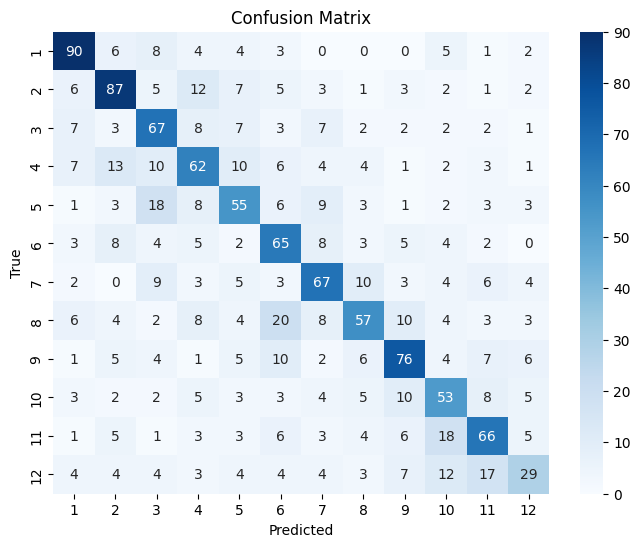

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'your_dataset.csv' with your file)
data = pd.read_csv('LDA.csv')

# Define features (X) and target labels (y)
X = data.drop('target', axis=1)  # Replace 'target_column' with your target column name
y = data['target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=None)  # Use None for maximum components (classes - 1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train_lda, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_lda)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
print(f"Accuracy: {accuracy:.2f}%")  # Display with two decimal places

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=set(y), yticklabels=set(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

